In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

import matplotlib.pyplot as plt; 
import pandas as pd
plt.rcdefaults()
%matplotlib inline

import PIL
import glob
import scikitplot as skplt

In [2]:
X_input = []
input_names = ["Band 1", "Band 2", "Band 3", "Band 4", "Band 6", "MRH", "MSH", "MTE", "MVI"]
X_names = np.asarray(input_names)

Y_output = []

In [3]:
Sa1_files = glob.glob("sa1_16to20_cleaned/*.png")

In [4]:
len(Sa1_files)

346

In [5]:
for filename in Sa1_files:
    filename = filename.split('/')[1]
    
    # Satellite 1
    Sa_1_File = "sa1_256/" + filename;
    Sa1 = PIL.Image.open(Sa_1_File).convert("L")
    Sa1arr = np.array(Sa1).flatten()
    
    
    # Satellite 2
    Sa_2_File = "sa2_256/" + filename;
    Sa2 = PIL.Image.open(Sa_2_File).convert("L")
    Sa2arr = np.array(Sa2).flatten()
    
    
    # Satellite 3
    Sa_3_File = "sa3_256/" + filename;
    Sa3 = PIL.Image.open(Sa_3_File).convert("L")
    Sa3arr = np.array(Sa3).flatten()
    
    # Satellite 4
    Sa_4_File = "sa4_256/" + filename;
    Sa4 = PIL.Image.open(Sa_4_File).convert("L")
    Sa4arr = np.array(Sa4).flatten()
    
    # Satellite 6
    Sa_6_File = "sa6_256/" + filename;
    Sa6 = PIL.Image.open(Sa_6_File).convert("L")
    Sa6arr = np.array(Sa6).flatten()
    
    
    
    # MRH
    MRH_File = "mrh_256/" + filename.replace('sat', "nam", 1)
    MRH = PIL.Image.open(MRH_File).convert("L")
    MRHarr = np.array(MRH).flatten()
    
    # MSH
    MSH_File = "msh_256/" + filename.replace('sat', "nam", 1)
    MSH = PIL.Image.open(MSH_File).convert("L")
    MSHarr = np.array(MSH).flatten()
    
    # MTE
    MTE_File = "mte_256/" + filename.replace('sat', "nam", 1)
    MTE = PIL.Image.open(MTE_File).convert("L")
    MTEarr = np.array(MTE).flatten()
    
    # MVI
    MVI_File = "mvi_256/" + filename.replace('sat', "nam", 1)
    MVI = PIL.Image.open(MVI_File).convert("L")
    MVIarr = np.array(MVI).flatten()
    

    
    # Radar
    Radar_File = "rad_256/" + filename.replace('sat', "rad", 1)
    Radar = PIL.Image.open(Radar_File).convert("L")
    Radararr = np.array(Radar).flatten()
    
    
    
    for i in range(len(Sa1arr)):
        x = [];
        x.append(Sa1arr[i])
        x.append(Sa2arr[i])
        x.append(Sa3arr[i])
        x.append(Sa4arr[i])
        x.append(Sa6arr[i])
        
        x.append(MRHarr[i])
        x.append(MSHarr[i])
        x.append(MTEarr[i])
        x.append(MVIarr[i])
        
        Y_output.append(Radararr[i])
        
        X_input.append(x)
        

In [6]:
X_input = np.array(X_input)
Y_output = np.array(Y_output)

In [7]:
Y_output.shape

(22675456,)

In [8]:
np.min(Y_output)

0

In [9]:
np.mean(Y_output)

1.8213885974332777

In [10]:
np.max(Y_output)

254

In [11]:
Y_output_no_zero = list(filter(lambda a: a != 0, Y_output))

In [12]:
np.shape(Y_output_no_zero)

(1910004,)

In [13]:
np.mean(Y_output_no_zero)

21.6234191132584

In [14]:
np.histogram(Y_output_no_zero, bins=range(0, int(np.max(Y_output_no_zero)/5), 5))

(array([561999, 330160, 216483, 153558, 114857,  88072,  70011,  56440,
         54543]), array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45]))

In [15]:
X_input.shape

(22675456, 9)

# Feature Importance

In [16]:
rf = RandomForestRegressor()
rf.fit(X_input, Y_output)

/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
for feat, score in zip(X_names, rf.feature_importances_):
    print('{}       {}'.format(feat, score))

Band 1       0.10115770650471763
Band 2       0.082008379053937
Band 3       0.07414505959651375
Band 4       0.06837670801082049
Band 6       0.08131300264242641
MRH       0.13194198199356844
MSH       0.14921116980849675
MTE       0.14355720786744003
MVI       0.16828878452207946


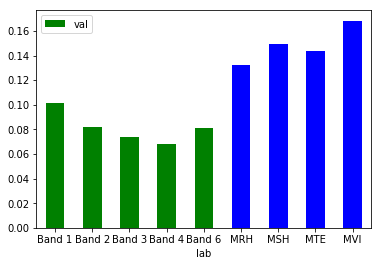

In [18]:
df = pd.DataFrame({'lab':input_names, 'val':rf.feature_importances_})
df.plot(kind = 'bar' , x='lab', y='val', rot=0, color=('g', 'g', 'g', 'g', 'g','b', 'b', 'b', 'b'))
plt.show()

# Test Train Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_input, Y_output, test_size=0.30, random_state=42)

In [21]:
X_train.shape

(15872819, 9)

In [22]:
X_test.shape

(6802637, 9)

In [23]:
y_train.shape

(15872819,)

In [24]:
y_test.shape

(6802637,)

In [25]:
rf_train = RandomForestRegressor()
rf_train.fit(X_train, y_train)

/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
for feat, score in zip(X_names, rf.feature_importances_):
    print('{}       {}'.format(feat, score))

Band 1       0.10115770650471763
Band 2       0.082008379053937
Band 3       0.07414505959651375
Band 4       0.06837670801082049
Band 6       0.08131300264242641
MRH       0.13194198199356844
MSH       0.14921116980849675
MTE       0.14355720786744003
MVI       0.16828878452207946


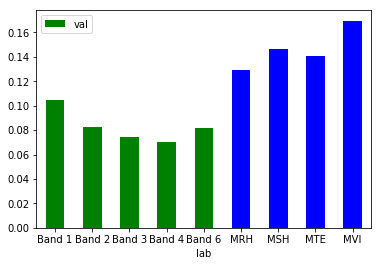

In [27]:
df = pd.DataFrame({'lab':input_names, 'val':rf_train.feature_importances_})
df.plot(kind = 'bar' , x='lab', y='val', rot=0, color=('g', 'g', 'g', 'g', 'g','b', 'b', 'b', 'b'))
plt.show()

# Evaluation on Trained

In [28]:
predictions_train = rf_train.predict(X_train)

In [29]:
predictions_train.shape

(15872819,)

In [30]:
y_train.shape

(15872819,)

In [31]:
errors_train = abs(predictions_train - y_train)

In [32]:
errors_train

array([0. , 0. , 0. , ..., 0. , 0.2, 0. ])

In [33]:
np.mean(errors_train)

0.4852267550117377

In [34]:
np.max(errors_train)

163.7669483423203

(array([1.5555302e+07, 2.0483000e+05, 6.2810000e+04, 2.4760000e+04,
        1.0947000e+04, 5.6930000e+03, 3.1830000e+03, 1.9180000e+03,
        1.1680000e+03, 7.5500000e+02, 4.8200000e+02, 3.3900000e+02,
        2.0300000e+02, 1.6800000e+02, 8.9000000e+01, 6.3000000e+01,
        4.1000000e+01, 2.4000000e+01, 9.0000000e+00, 1.5000000e+01,
        9.0000000e+00, 3.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        5.0000000e+00]),
 array([  0.        ,   6.55067793,  13.10135587,  19.6520338 ,
         26.20271173,  32.75338967,  39.3040676 ,  45.85474554,
         52.40542347,  58.9561014 ,  65.50677934,  72.05745727,
         78.6081352 ,  85.15881314,  91.70949107,  98.26016901,
        104.81084694, 111.36152487, 117.91220281, 124.46288074,
        131.01355867, 137.56423661, 144.11491454, 150.66559247,
        157.21627041, 163.76694834]),
 <a list of 25 Patch objects>)

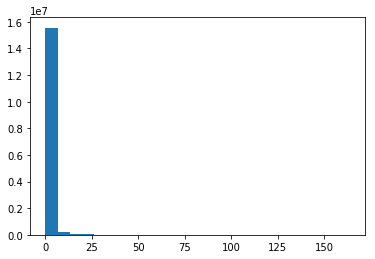

In [35]:
plt.hist(errors_train, bins='auto')

(array([1.31306e+05, 3.01850e+04, 9.86900e+03, 4.07400e+03, 1.89700e+03,
        9.84000e+02, 5.27000e+02, 2.84000e+02, 1.42000e+02, 7.90000e+01,
        3.90000e+01]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120]),
 <a list of 11 Patch objects>)

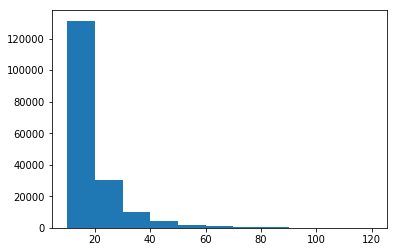

In [36]:
plt.hist(errors_train, bins=range(10, 130, 10))

In [37]:
np.sum(errors_train)

7701916.456258655

### Confusion Matrix

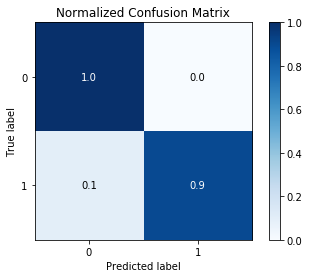

In [38]:
y_train_copy = np.copy(y_train)
y_train_copy[y_train_copy < 18] = 0
y_train_copy[y_train_copy >= 18] = 1

predictions_train_copy = np.copy(predictions_train)
predictions_train_copy[predictions_train_copy < 18] = 0
predictions_train_copy[predictions_train_copy >= 18] = 1

skplt.metrics.plot_confusion_matrix(y_train_copy, predictions_train_copy, normalize=True)
plt.show()

# Evaluation on Test

In [39]:
predictions_test = rf_train.predict(X_test)

In [40]:
predictions_test.shape

(6802637,)

In [41]:
y_test.shape

(6802637,)

In [42]:
errors_test = abs(predictions_test - y_test)

In [43]:
errors_test

array([0. , 0. , 0.9, ..., 0. , 0. , 0. ])

In [44]:
np.min(errors_test)

0.0

In [45]:
np.mean(errors_test)

1.2355156168958752

In [46]:
np.max(errors_test)

233.7

(array([6.566511e+06, 1.402500e+05, 4.735100e+04, 2.030100e+04,
        1.053900e+04, 6.018000e+03, 3.655000e+03, 2.361000e+03,
        1.684000e+03, 1.145000e+03, 8.260000e+02, 5.660000e+02,
        4.250000e+02, 2.740000e+02, 2.150000e+02, 1.650000e+02,
        1.070000e+02, 9.200000e+01, 5.300000e+01, 4.700000e+01,
        2.100000e+01, 1.100000e+01, 1.300000e+01, 7.000000e+00]),
 array([  0.    ,   9.7375,  19.475 ,  29.2125,  38.95  ,  48.6875,
         58.425 ,  68.1625,  77.9   ,  87.6375,  97.375 , 107.1125,
        116.85  , 126.5875, 136.325 , 146.0625, 155.8   , 165.5375,
        175.275 , 185.0125, 194.75  , 204.4875, 214.225 , 223.9625,
        233.7   ]),
 <a list of 24 Patch objects>)

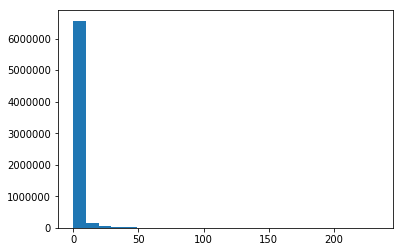

In [47]:
plt.hist(errors_test, bins='auto')

(array([138803.,  45776.,  19787.,  10023.,   5690.,   3522.,   2228.,
          1649.,   1062.,    747.,    527.]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120]),
 <a list of 11 Patch objects>)

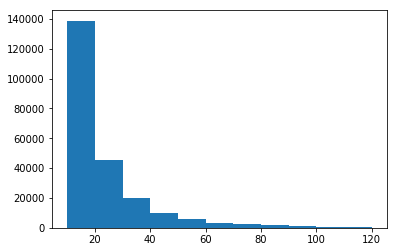

In [48]:
plt.hist(errors_test, bins=range(10, 130, 10))

In [49]:
np.sum(errors_test)

8404764.249573706

### Confusion Matrix


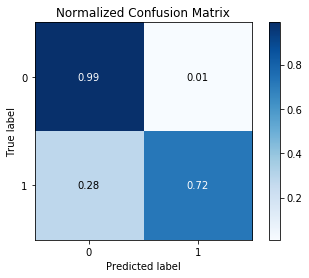

In [50]:
y_test_copy = np.copy(y_test)
y_test_copy[y_test_copy < 18] = 0
y_test_copy[y_test_copy >= 18] = 1

predictions_test_copy = np.copy(predictions_test)
predictions_test_copy[predictions_test_copy < 18] = 0
predictions_test_copy[predictions_test_copy >= 18] = 1

skplt.metrics.plot_confusion_matrix(y_test_copy, predictions_test_copy, normalize=True)
plt.show()